# Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [2]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [11]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [9]:
df.isna()

,Survived,Age,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [12]:
df['Age'].isna() # If NUll Show True otherwise it is false

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [14]:
df.dropna().sample() # It will pick one sample to delete

,Survived,Age,Fare
10,1,4.0,16.7


In [18]:
df['Age'].dropna() # Drop all the NAN values

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [20]:
df['Age'].dropna().sample() # Take one random sample 

785    25.0
Name: Age, dtype: float64

In [22]:
df['Age'].isnull().sum()

177

In [25]:
df['Age'].dropna().sample(177) # Gives 177 sampples

551    27.0
672    70.0
131    20.0
860    41.0
296    23.5
       ... 
92     46.0
225    22.0
682    20.0
62     45.0
213    30.0
Name: Age, Length: 177, dtype: float64

In [29]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

129    45.0
404    20.0
430    28.0
285    33.0
348     3.0
       ... 
505    18.0
700    18.0
885    39.0
880    25.0
184     4.0
Name: Age, Length: 177, dtype: float64

In [30]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) # gives that many samples. IF Random state is 0 then it will not change every iteration if u did not mention that it will change

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [31]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [37]:
df[df['Age'].isnull()].shape

(177, 3)

In [53]:
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [55]:
random_sample.index=df[df['Age'].isnull()].index
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [57]:
 df.loc[df['Age'].isnull(),'Age'+'_random']=random_sample
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [38]:
def impute_nan(df,variable,median):
    df[variable+"_Median"]=df[variable].fillna(median) # Replace Nan values with median value and print entire column that Stored in the variable_median.
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [39]:
median=df.Age.median()

In [40]:
median


28.0

In [41]:
impute_nan(df,"Age",median)

In [42]:
df

,Survived,Age,Fare,Age_Median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [72]:
def impute_nan1(df,variable,median):
    df[variable+"_Median"]=df[variable].fillna(median) # Replace Nan values with median value and print entire column that Stored in the variable_median.
    df[variable+"_random"]=df[variable]
#     ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
#     ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample # random sample values are assigning to the df.loc
    #df.loc- This part of the code is used to access and modify specific rows and columns in the DataFrame df. It allows for label-based indexing.
    # df.loc[df[variable].isnull(), variable+'_random']: This part of the code selects rows where the values in the column specified by the variable variable are missing (True values in the boolean mask), and then selects the column named variable+'_random'. This column is created if it doesn't already exist.

In [73]:
impute_nan1(df,"Age",median)

In [74]:
df

,Survived,Age,Fare,Age_Median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

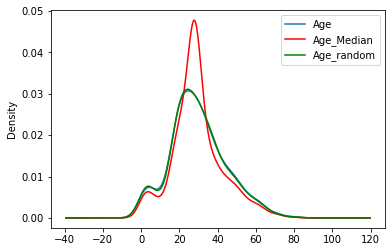

In [62]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_Median'].plot(kind='kde',ax=ax,color='red')
df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best') #Age _random and age are no change
# Random simple imputation is very useful when compared to median because Age_random very slight deviation wrt to age 

# Advantages

1. Easy To implement

2. There is less distortion in variance

# Disadvantage

1. Every situation randomness wont work

# Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [9]:

df.head()
df[df['Age'].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [15]:
df.loc[df['Age'].isnull(),'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [32]:
import numpy as np
Age_Null_index=df.index[df['Age'].isnull()].tolist() #df[df['age'].isnull()].index.tolist()
print(Age_Null_index)

[5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]


In [33]:
df[df['Age'].isnull()].index.tolist()

[5,
 17,
 19,
 26,
 28,
 29,
 31,
 32,
 36,
 42,
 45,
 46,
 47,
 48,
 55,
 64,
 65,
 76,
 77,
 82,
 87,
 95,
 101,
 107,
 109,
 121,
 126,
 128,
 140,
 154,
 158,
 159,
 166,
 168,
 176,
 180,
 181,
 185,
 186,
 196,
 198,
 201,
 214,
 223,
 229,
 235,
 240,
 241,
 250,
 256,
 260,
 264,
 270,
 274,
 277,
 284,
 295,
 298,
 300,
 301,
 303,
 304,
 306,
 324,
 330,
 334,
 335,
 347,
 351,
 354,
 358,
 359,
 364,
 367,
 368,
 375,
 384,
 388,
 409,
 410,
 411,
 413,
 415,
 420,
 425,
 428,
 431,
 444,
 451,
 454,
 457,
 459,
 464,
 466,
 468,
 470,
 475,
 481,
 485,
 490,
 495,
 497,
 502,
 507,
 511,
 517,
 522,
 524,
 527,
 531,
 533,
 538,
 547,
 552,
 557,
 560,
 563,
 564,
 568,
 573,
 578,
 584,
 589,
 593,
 596,
 598,
 601,
 602,
 611,
 612,
 613,
 629,
 633,
 639,
 643,
 648,
 650,
 653,
 656,
 667,
 669,
 674,
 680,
 692,
 697,
 709,
 711,
 718,
 727,
 732,
 738,
 739,
 740,
 760,
 766,
 768,
 773,
 776,
 778,
 783,
 790,
 792,
 793,
 815,
 825,
 826,
 828,
 832,
 837,
 839,
 84

In [34]:
df["Age_Nan"]=np.where(df['Age'].isnull(),1,0)

In [35]:
df['Age_Nan']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Age_Nan, Length: 891, dtype: int32

In [36]:
df.at[17, 'Age_Nan']

1

In [37]:
df.at[16,'Age_Nan']

0

In [38]:
df.Age.median()

28.0

In [39]:
df['Age'].median()

28.0

In [40]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [42]:
df.at[17,'Age']

28.0

## Advantages

Easy to implement

Captures the importance of missing values


## Disadvantages

Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation

<AxesSubplot:>

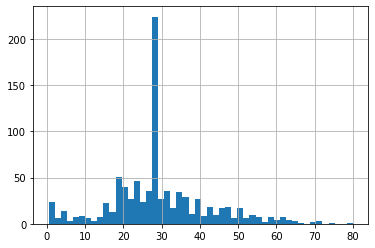

In [43]:
df['Age'].hist(bins=50)

In [78]:
df.Age.mean()+3*df.Age.std()

68.42067214450208

In [77]:
# mean+3std away
extreme=df.Age.mean()+3*df.Age.std()

<AxesSubplot:xlabel='Age'>

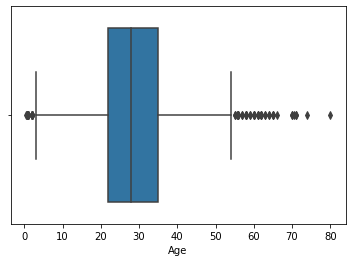

In [49]:
import seaborn as sns
sns.boxplot(df['Age'])

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Age_Nan'}>]], dtype=object)

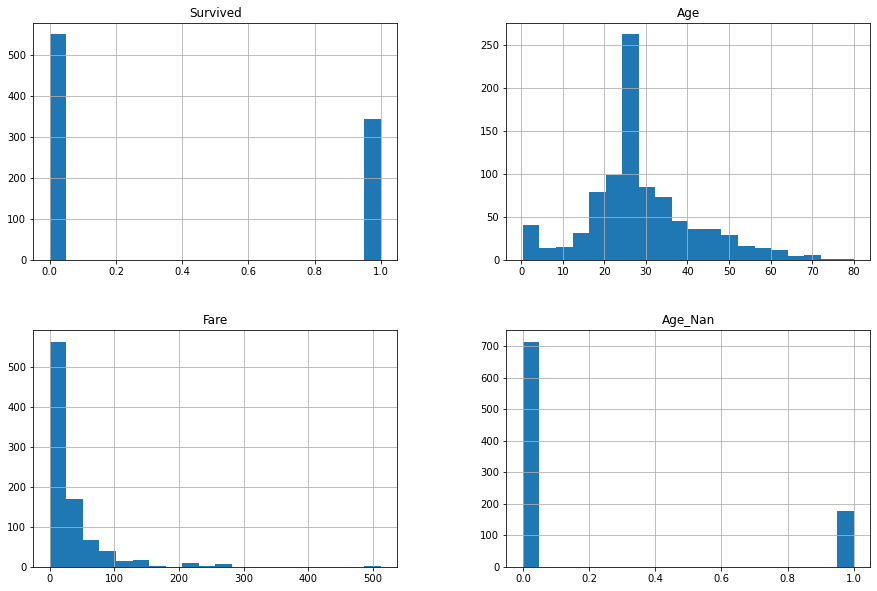

In [47]:
df.hist(bins=20, figsize=(15, 10))

<Figure size 720x432 with 0 Axes>

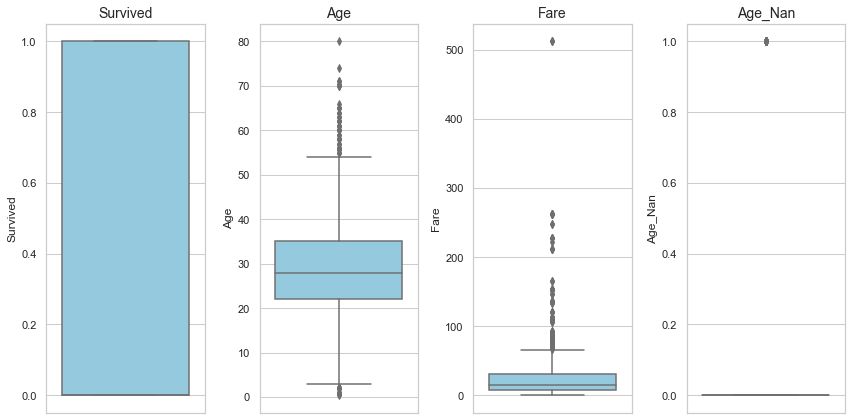

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set the style of the plots

# Iterate over each column and create a box plot
for i, col in enumerate(df.columns):
    plt.subplot(1, len(df.columns), i + 1)
    sns.boxplot(y=df[col].dropna(), color='skyblue')  # You can adjust the color here
    plt.title(col, fontsize=14)
    plt.xlabel('')  # Remove x-labels for better clarity

plt.tight_layout()
plt.show()

In [93]:
import pandas as pd
df2=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [94]:
extreme=df2.Age.mean()+3*df2.Age.std()

In [95]:
def impute_nan(df2,variable,median,extreme):
    df2[variable+"_end_distribution"]=df2[variable].fillna(extreme)
    df2[variable].fillna(median,inplace=True)

In [69]:
# def impute_nan1(df,variable,median,extreme):
#     df[variable+"_end_distribution"]=df[variable].fillna(extreme)
   

In [96]:
impute_nan(df2,'Age',df2.Age.median(),extreme)
df2.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [91]:
# impute_nan(df,'Age',df.Age.median(),extreme)
# df.head()

In [76]:
df.head(10)
df['Age'].fillna(extreme)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [58]:
quartiles = df['Age'].quantile([0.25, 0.5, 0.75])

In [59]:
quartiles

0.25    22.0
0.50    28.0
0.75    35.0
Name: Age, dtype: float64

In [63]:
print(35+1.5*(35.0-22.0))

54.5


In [65]:
df[df['Age']>54.5]

,Survived,Age,Fare,Age_Nan,Age_end_distribution
11,1,58.0,26.5500,0,58.0
15,1,55.0,16.0000,0,55.0
33,0,66.0,10.5000,0,66.0
54,0,65.0,61.9792,0,65.0
94,0,59.0,7.2500,0,59.0
96,0,71.0,34.6542,0,71.0
116,0,70.5,7.7500,0,70.5
152,0,55.5,8.0500,0,55.5
170,0,61.0,33.5000,0,61.0
174,0,56.0,30.6958,0,56.0


<AxesSubplot:>

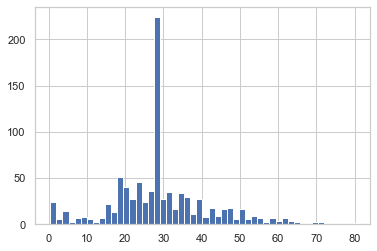

In [97]:
df2['Age'].hist(bins=50)

<AxesSubplot:>

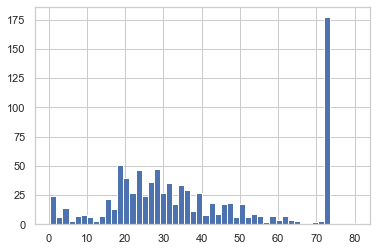

In [98]:
df2['Age_end_distribution'].hist(bins=50)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

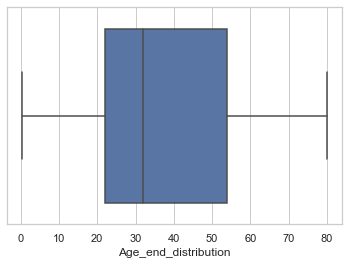

In [99]:
sns.boxplot('Age_end_distribution',data=df2)

In [100]:
import pandas as pd
df3=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [101]:
def impute_nan(df3,variable,median,extreme):
    df3[variable+"_end_distribution"]=df3[variable].fillna(extreme)
    df3[variable].fillna(median,inplace=True)

In [102]:
extreme=df3.Age.mean()+3*df3.Age.std()
impute_nan(df3,'Age',df3.Age.median(),extreme)
df3.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

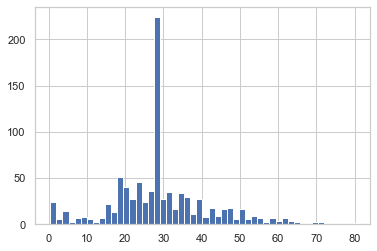

In [105]:
df3['Age'].hist(bins=50)

<AxesSubplot:>

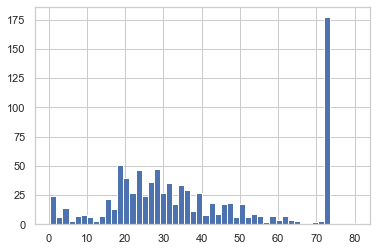

In [106]:
df3['Age_end_distribution'].hist(bins=50)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

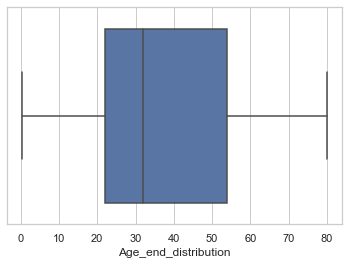

In [107]:
sns.boxplot(df3['Age_end_distribution'])